# Model Evaluation and Improvement

In [61]:
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import PrecisionRecallDisplay

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_auc_score

In [4]:
cf_df = pd.read_excel('data/crowdfunding_ex.xlsx')

In [13]:
cf_df.rename(columns={'보상수': '#ofRewards'}, inplace=True)
cf_df['Success'] = cf_df['Goal'] <= cf_df['Funded']

In [14]:
x_df =  cf_df[["Backers", "CountryCode", "VideoCount", "ImageCount", "TagCode", "Goal", "Period", "SNS", 
               "Fiends" , "#ofCreation", "#ofRewards"]]
y = cf_df['Success']

In [15]:
y.value_counts()

False    549
True     218
Name: Success, dtype: int64

In [18]:
X_train, X_test, y_train, y_test = train_test_split(x_df, y, random_state=0)

In [19]:
tree = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
pred_tree = tree.predict(X_test)
print("Test set score: {:.2f}".format(tree.score(X_test, y_test)))

Test set score: 0.81


In [20]:
logreg = LogisticRegression(C=0.1, max_iter=1000).fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)
print("logreg score: {:.2f}".format(logreg.score(X_test, y_test)))

logreg score: 0.83


# Confusion Matrix

In [22]:
confusion = confusion_matrix(y_test, pred_tree)
print("counfusion matrix:\n", confusion)

counfusion matrix:
 [[126  12]
 [ 25  29]]


In [23]:
confusion = confusion_matrix(y_test, pred_logreg)
print("counfusion matrix:\n", confusion)

counfusion matrix:
 [[129   9]
 [ 23  31]]


In [24]:
y_test.value_counts() # 1 is "success" and 2 is "fail"

False    138
True      54
Name: Success, dtype: int64

In [30]:
def target_class_change(value: bool):
    return int(value)

In [31]:
cf_df['Success_target'] = cf_df['Success'].apply(target_class_change)
y = cf_df['Success_target']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(x_df, y, random_state=0)
y_test.value_counts()

0    138
1     54
Name: Success_target, dtype: int64

In [33]:
tree = DecisionTreeClassifier(max_depth=3).fit(X_train, y_train)
pred_tree = tree.predict(X_test)
print("Test set score: {:.2f}".format(tree.score(X_test, y_test)))

confusion = confusion_matrix(y_test, pred_tree)
print("counfusion matrix:\n", confusion)

Test set score: 0.86
counfusion matrix:
 [[120  18]
 [  9  45]]


In [34]:
logreg = LogisticRegression(C=0.1, max_iter=1000).fit(X_train, y_train)

pred_logreg = logreg.predict(X_test)
print("logreg score: {:.2f}".format(logreg.score(X_test, y_test)))

confusion = confusion_matrix(y_test, pred_logreg)
print("counfusion matrix:\n", confusion)

logreg score: 0.83
counfusion matrix:
 [[129   9]
 [ 23  31]]


## plot_confusioin_matrix

<function matplotlib.pyplot.show(close=None, block=None)>

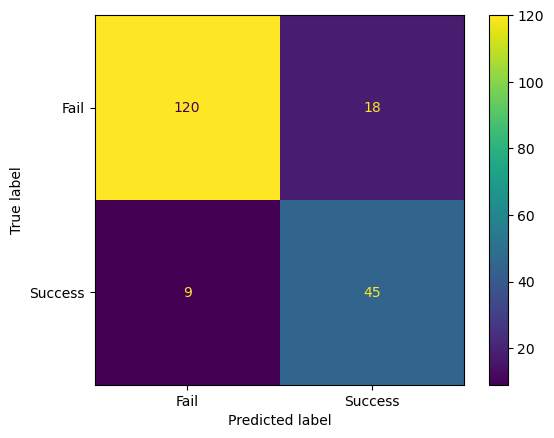

In [36]:
ConfusionMatrixDisplay.from_estimator(tree, X_test, y_test, display_labels=['Fail', 'Success'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

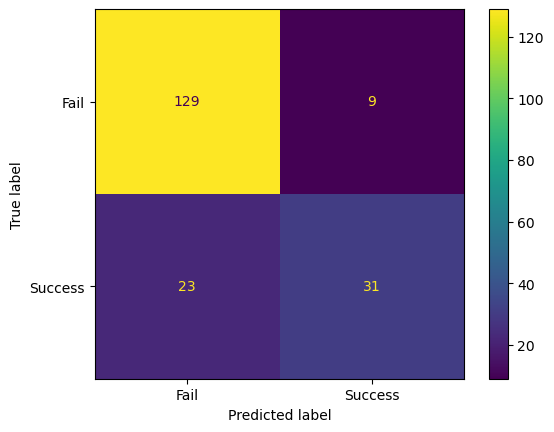

In [37]:
ConfusionMatrixDisplay.from_estimator(logreg, X_test, y_test, display_labels=['Fail', 'Success'])
plt.show

# Classification Report

In [42]:
print(classification_report(y_test, pred_tree))
print()
print(classification_report(y_test, pred_logreg, target_names=["Fail", "Success"]))

              precision    recall  f1-score   support

           0       0.93      0.87      0.90       138
           1       0.71      0.83      0.77        54

    accuracy                           0.86       192
   macro avg       0.82      0.85      0.83       192
weighted avg       0.87      0.86      0.86       192


              precision    recall  f1-score   support

        Fail       0.85      0.93      0.89       138
     Success       0.78      0.57      0.66        54

    accuracy                           0.83       192
   macro avg       0.81      0.75      0.77       192
weighted avg       0.83      0.83      0.82       192



# Precision-recall Curve and ROC Curves

In [43]:
tree.predict_proba(X_test)

array([[0.88135593, 0.11864407],
       [0.93877551, 0.06122449],
       [0.08888889, 0.91111111],
       [0.7       , 0.3       ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.93877551, 0.06122449],
       [0.32142857, 0.67857143],
       [0.47368421, 0.52631579],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.88135593, 0.11864407],
       [0.7       , 0.3       ],
       [1.        , 0.        ],
       [0.88135593, 0.11864407],
       [0.88135593, 0.11864407],
       [0.7       , 0.3       ],
       [0.08888889, 0.91111111],
       [1.        , 0.        ],
       [0.93877551, 0.06122449],
       [0.93877551, 0.06122449],
       [0.08888889, 0.91111111],
       [0.93877551, 0.06122449],
       [0.13793103, 0.86206897],
       [0.93877551, 0.06122449],
       [0.08888889, 0.91111111],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.93877551, 0.06122449],
       [1.

Average Precision Score: 0.742


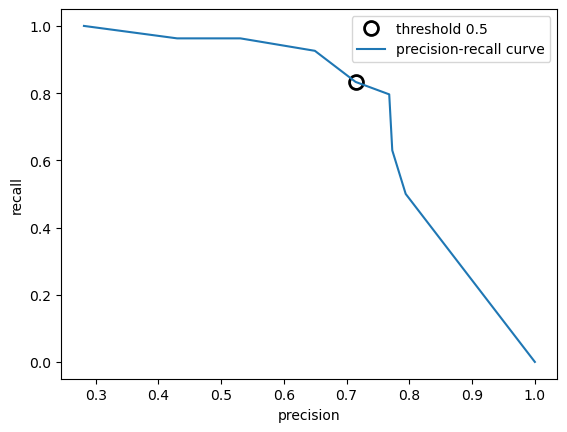

In [45]:
precision_tree, recall_tree, thresholds_tree = precision_recall_curve(y_test, tree.predict_proba(X_test)[:,1])
close_default_tree = np.argmin(np.abs(thresholds_tree-0.5))
plt.plot(precision_tree[close_default_tree], recall_tree[close_default_tree], 'o', 
         markersize=10, label='threshold 0.5', fillstyle='none', c='k', mew=2)

plt.plot(precision_tree, recall_tree, label="precision-recall curve")
plt.xlabel("precision")
plt.ylabel("recall")
plt.legend(loc='best')

ap_tree = average_precision_score(y_test, tree.predict_proba(X_test)[:, 1])
print("Average Precision Score: {:.3f}".format(ap_tree))

### precision_recall_curve?

Compute precision-recall pairs for different probability thresholds.

##### Returns
-------
precision : ndarray of shape (n_thresholds + 1,)
    Precision values such that element i is the precision of
    predictions with score >= thresholds[i] and the last element is 1.

recall : ndarray of shape (n_thresholds + 1,)
    Decreasing recall values such that element i is the recall of
    predictions with score >= thresholds[i] and the last element is 0.

thresholds : ndarray of shape (n_thresholds,)
    Increasing thresholds on the decision function used to compute
    precision and recall where `n_thresholds = len(np.unique(probas_pred))`

In [46]:
np.unique(tree.predict_proba(X_test)[:,1])

array([0.        , 0.06122449, 0.11864407, 0.3       , 0.52631579,
       0.67857143, 0.86206897, 0.91111111])

In [47]:
thresholds_tree

array([0.        , 0.06122449, 0.11864407, 0.3       , 0.52631579,
       0.67857143, 0.86206897, 0.91111111])

In [48]:
np.abs(thresholds_tree-0.5)

array([0.5       , 0.43877551, 0.38135593, 0.2       , 0.02631579,
       0.17857143, 0.36206897, 0.41111111])

In [49]:
np.argmin(np.abs(thresholds_tree-0.5))

4

In [50]:
precision_tree

array([0.28125   , 0.42975207, 0.53061224, 0.64935065, 0.71428571,
       0.76785714, 0.77272727, 0.79411765, 1.        ])

In [51]:
recall_tree

array([1.        , 0.96296296, 0.96296296, 0.92592593, 0.83333333,
       0.7962963 , 0.62962963, 0.5       , 0.        ])

### average_precision_score?

Compute average precision (AP) from prediction scores.

AP summarizes a precision-recall curve as the weighted mean of precisions
achieved at each threshold, with the increase in recall from the previous
threshold used as the weight:

Average Precision Score: 0.742


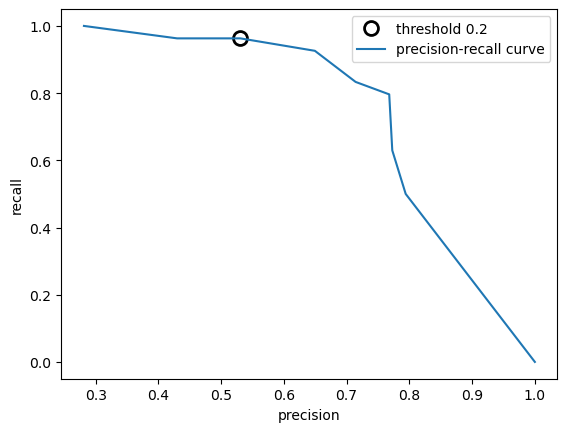

In [52]:
precision_tree, recall_tree, thresholds_tree = precision_recall_curve(y_test, tree.predict_proba(X_test)[:,1])
close_default_tree = np.argmin(np.abs(thresholds_tree-0.2))
plt.plot(precision_tree[close_default_tree], recall_tree[close_default_tree], 'o', 
         markersize=10, label='threshold 0.2', fillstyle='none', c='k', mew=2)

plt.plot(precision_tree, recall_tree, label="precision-recall curve")
plt.xlabel("precision")
plt.ylabel("recall")
plt.legend(loc='best')

ap_tree = average_precision_score(y_test, tree.predict_proba(X_test)[:, 1])
print("Average Precision Score: {:.3f}".format(ap_tree))

Average Precision Score: 0.742


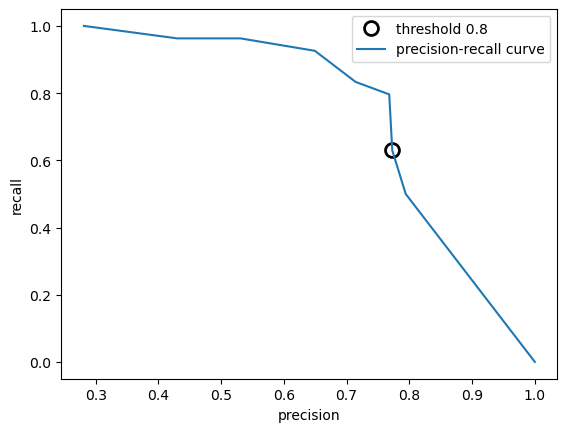

In [55]:
precision_tree, recall_tree, thresholds_tree = precision_recall_curve(y_test, tree.predict_proba(X_test)[:,1])
close_default_tree = np.argmin(np.abs(thresholds_tree-0.8))
plt.plot(precision_tree[close_default_tree], recall_tree[close_default_tree], 'o', 
         markersize=10, label='threshold 0.8', fillstyle='none', c='k', mew=2)

plt.plot(precision_tree, recall_tree, label="precision-recall curve")
plt.xlabel("precision")
plt.ylabel("recall")
plt.legend(loc='best')

ap_tree = average_precision_score(y_test, tree.predict_proba(X_test)[:, 1])
print("Average Precision Score: {:.3f}".format(ap_tree))

Average Precision Score: 0.800


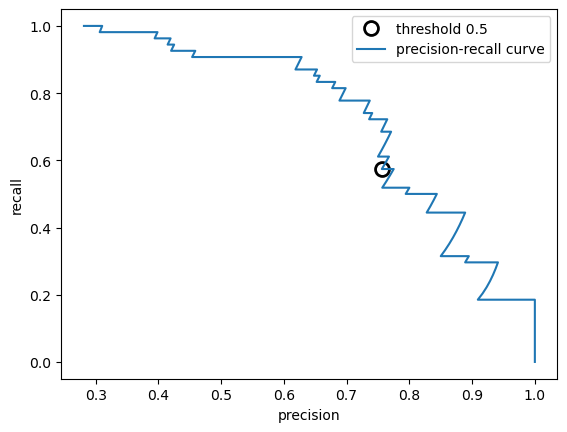

In [56]:
precision_logreg, recall_logreg, thresholds_logreg = precision_recall_curve(y_test, logreg.predict_proba(X_test)[:,1])
close_default_logreg = np.argmin(np.abs(thresholds_logreg-0.5))
plt.plot(precision_logreg[close_default_logreg], recall_logreg[close_default_logreg], 'o', 
         markersize=10, label='threshold 0.5', fillstyle='none', c='k', mew=2)

plt.plot(precision_logreg, recall_logreg, label="precision-recall curve")
plt.xlabel("precision")
plt.ylabel("recall")
plt.legend(loc='best')

log_reg = average_precision_score(y_test, logreg.predict_proba(X_test)[:, 1])
print("Average Precision Score: {:.3f}".format(log_reg))

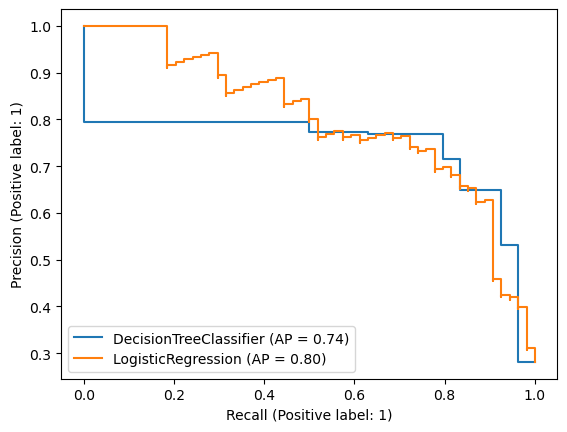

In [59]:
fig, ax = plt.subplots()
PrecisionRecallDisplay.from_estimator(tree, X_test, y_test, ax=ax)
PrecisionRecallDisplay.from_estimator(logreg, X_test, y_test, ax=ax)
plt.show()

In [60]:
PrecisionRecallDisplay?

Init signature:
PrecisionRecallDisplay(
    precision,
    recall,
    *,
    average_precision=None,
    estimator_name=None,
    pos_label=None,
)
Docstring:     
Precision Recall visualization.

It is recommend to use
:func:`~sklearn.metrics.PrecisionRecallDisplay.from_estimator` or
:func:`~sklearn.metrics.PrecisionRecallDisplay.from_predictions` to create
a :class:`~sklearn.metrics.PredictionRecallDisplay`. All parameters are
stored as attributes.

Read more in the :ref:`User Guide <visualizations>`.

Parameters
----------
precision : ndarray
    Precision values.

recall : ndarray
    Recall values.

average_precision : float, default=None
    Average precision. If None, the average precision is not shown.

estimator_name : str, default=None
    Name of estimator. If None, then the estimator name is not shown.

pos_label : str or int, default=None
    The class considered as the positive class. If None, the class will not
    be shown in the legend.

    .. versionadded:: 0.24

At

# ROC and AUC

In [62]:
rf = RandomForestClassifier(n_estimators=100, random_state=0, max_features=2)
rf.fit(X_train, y_train)

RandomForestClassifier(max_features=2, random_state=0)

AUC of RandomForest: 0.928


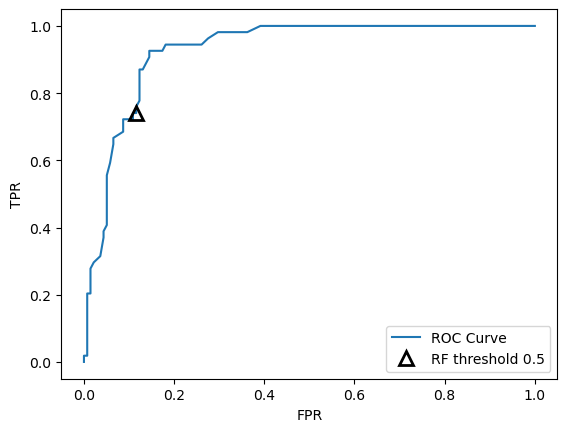

In [ ]:
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])

plt.plot(fpr_rf, tpr_rf, label="ROC Curve")

plt.xlabel("FPR")
plt.ylabel("TPR")
close_default_rf = np.argmin(np.abs(thresholds_rf-0.5))
plt.plot(fpr_rf[close_default_rf], tpr_rf[close_default_rf], '^', markersize=10,
         label="RF threshold 0.5", fillstyle="none", c='k', mew=2)

plt.legend(loc=4)

rf_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])
print("AUC of RandomForest: {:.3f}".format(rf_auc))

# Metrics for Multiclass Classification

In [ ]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], 
                                                    random_state = 0)

In [ ]:
from sklearn.metrics import accuracy_score

lr = LogisticRegression(solver='liblinear', multi_class='ovr').fit(X_train, y_train)
pred = lr.predict(X_test)
print("Acciracy: {:.3f}".format(accuracy_score(y_test, pred)))
print("Confusion Matrix:\n", confusion_matrix(y_test, pred))

Acciracy: 0.868
Confusion Matrix:
 [[13  0  0]
 [ 0 11  5]
 [ 0  0  9]]


In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
scheme if the 'multi_class' option is set to 'ovr', and uses the
cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
(Currently the 'multinomial' option is supported only by the 'lbfgs',
'sag', 'saga' and 'newton-cg' solvers.)

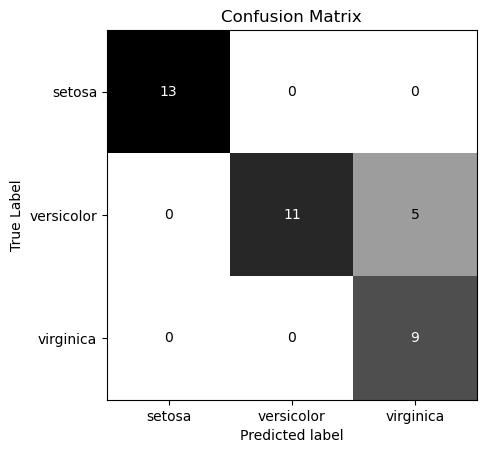

In [ ]:
import mglearn

scores_image = mglearn.tools.heatmap(
    confusion_matrix(y_test, pred), xlabel='Predicted label',
    ylabel='True Label', xticklabels=iris_dataset.target_names,
    yticklabels=iris_dataset.target_names, cmap=plt.cm.gray_r, fmt="%d")    

plt.title("Confusion Matrix")
plt.gca().invert_yaxis()

In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.69      0.81        16
           2       0.64      1.00      0.78         9

    accuracy                           0.87        38
   macro avg       0.88      0.90      0.87        38
weighted avg       0.92      0.87      0.87        38



In [ ]:
RandomForestClassifier?